In [2]:
import time
t_start = time.time()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [4]:
N_FILES = 6

In [5]:
"""
Original link: https://www.kaggle.com/c/decoding-the-human-brain/data
"""

# def create_data():
#     path = "Swarm_Behaviour.csv"
#     total_df = pd.read_csv(path)
#     N_COLS = len(total_df.columns)
#     # this creates the slices from the original csv (too large to commit)
#     for i in range(N_FILES):
#         slice_df = total_df[total_df.columns[i * N_COLS // N_FILES: (i+1) * N_COLS // N_FILES]]
#         slice_df.to_parquet(f'slice{i}.parquet.gzip')

# create_data()

'\nOriginal link: https://www.kaggle.com/c/decoding-the-human-brain/data\n'

In [6]:
# use this cell to recreate the original dataframe using the slices
dfs = []

for i in range(N_FILES):
    slice_df = pd.read_parquet(f'slice{i}.parquet.gzip')
    dfs.append(slice_df)

original_df = pd.concat(dfs, axis=1)

In [7]:
original_df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [8]:
df = original_df.reset_index().rename(columns={"index": "id"})
COLS = ["id", 'x', 'y', 'xVel', 'yVel', 'xA', 'yA', 'xS', 'yS', 'xC', 'yC', 'nAC', 'nS']
TS_LENGTH = 200
INT_DIGITS = 3

In [9]:
target = df[["id", "Swarm_Behaviour"]].astype(int)
df = df.drop("Swarm_Behaviour", axis=1)

<Axes: xlabel='Swarm_Behaviour'>

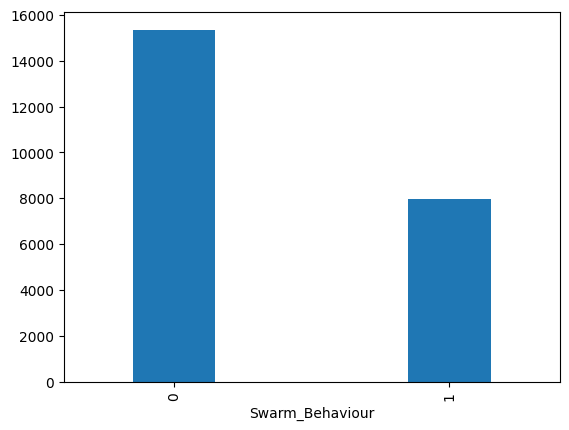

In [10]:
target.Swarm_Behaviour.value_counts().plot.bar(width=0.3)

In [11]:
target.head(5)

,id,Swarm_Behaviour
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [12]:
df.head(2)

,id,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,...,xVel200,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200
0,0,562.05,-0.62,-10.70,-4.33,0.0,0.0,0.0,0.0,0.0,...,-8.04,-15.15,0.0,0.0,0.0,0.0,0.0,0.0,28,0
1,1,175.66,-57.09,2.31,-2.67,0.0,0.0,0.0,0.0,0.0,...,10.04,-3.48,0.0,0.0,0.0,0.0,0.0,0.0,4,0


In [13]:
reformatted_cols = ["id"] + [f"{COLS[i]}_{j:0{INT_DIGITS}}" for j in range(1, 201) for i in range(1, len(COLS))]
df.columns = reformatted_cols

In [14]:
df.head(2)

,id,x_001,y_001,xVel_001,yVel_001,xA_001,yA_001,xS_001,yS_001,xC_001,...,xVel_200,yVel_200,xA_200,yA_200,xS_200,yS_200,xC_200,yC_200,nAC_200,nS_200
0,0,562.05,-0.62,-10.70,-4.33,0.0,0.0,0.0,0.0,0.0,...,-8.04,-15.15,0.0,0.0,0.0,0.0,0.0,0.0,28,0
1,1,175.66,-57.09,2.31,-2.67,0.0,0.0,0.0,0.0,0.0,...,10.04,-3.48,0.0,0.0,0.0,0.0,0.0,0.0,4,0


In [15]:
melted = df.melt(id_vars="id")


In [16]:
variable_raw = melted.variable.copy()
melted["variable"] = variable_raw.apply(lambda string: string.split("_")[0])
melted["time"] = variable_raw.apply(lambda string: string.split("_")[1]).astype(int)

In [17]:
variables = melted.variable.unique()
means = melted.groupby(["id", "variable"]).value.mean().unstack()
means.columns = [f"{col}_mean" for col in variables]

stds = melted.groupby(["id", "variable"]).value.std().unstack()
stds.columns = [f"{col}_std" for col in variables]


In [18]:
features = pd.concat([means, stds], axis=1)

In [19]:
features

,x_mean,y_mean,xVel_mean,yVel_mean,xA_mean,yA_mean,xS_mean,yS_mean,xC_mean,yC_mean,...,xVel_std,yVel_std,xA_std,yA_std,xS_std,yS_std,xC_std,yC_std,nAC_std,nS_std
id,,,,,,,,,,,,,,,,,,,,,
0,35.495,0.265,10.27850,0.00000,0.00000,0.00000,-3.10760,-4.16675,0.00000,0.00000,...,796.994909,0.000000,0.000000,0.000000,5.732348,582.479151,0.000000,0.000000,0.000000,6.723990
1,12.620,0.040,-6.35120,0.00000,0.00000,0.00645,-0.89155,-25.84345,0.00000,0.00000,...,827.385400,0.000000,0.000000,0.257524,7.853052,603.466757,0.000000,0.000000,0.439822,7.889210
2,9.160,0.060,32.77955,0.00000,-0.00755,0.00105,-0.45095,59.53900,0.00000,-0.12710,...,736.131756,0.000000,0.203797,0.116737,6.369284,588.192326,0.000000,0.210280,0.114204,6.434694
3,11.740,0.105,-11.52095,-0.07315,0.00000,-0.01135,-0.69555,-46.07760,1.03220,0.00000,...,753.391001,0.109712,0.000000,0.746680,2.067728,576.061088,0.012244,0.000000,0.941464,1.690816
4,13.425,0.330,-145.79650,-0.87500,0.00000,12.00495,-4.39505,-3.95280,-0.25000,0.00000,...,814.595247,0.374266,0.000000,308.788492,8.486265,591.714883,0.639959,0.000000,80.259402,8.390766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,12.135,0.370,46.54075,-0.61000,0.00000,-3.58965,-3.36790,5.63760,-0.81000,0.00000,...,804.430821,0.528485,0.000000,56.156138,8.505155,618.147326,0.418060,0.000000,59.296856,7.625369
23305,77.160,0.385,20.57555,-0.10430,-0.01235,0.05870,-1.00475,2.95075,-0.68075,-0.00805,...,783.015414,0.048697,0.118864,6.656341,4.499932,572.062434,0.189044,0.146910,10.154901,5.038219
23306,36.960,0.270,-21.06205,0.00000,0.00000,0.00000,-3.06130,-77.60585,0.00000,0.00000,...,786.149009,0.000000,0.000000,0.000000,6.279265,568.788003,0.000000,0.000000,0.000000,7.024094


<Axes: >

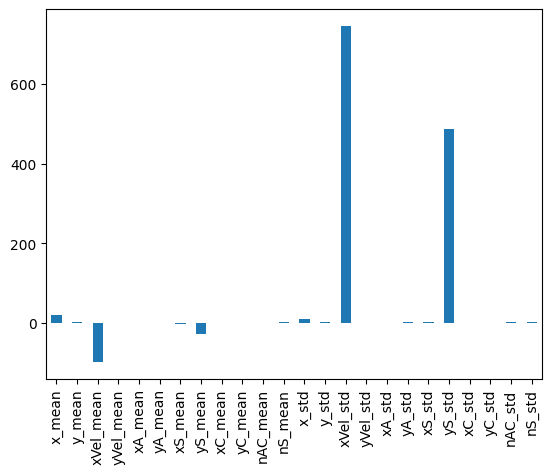

In [20]:
features[target.Swarm_Behaviour == 1].mean().plot.bar()

<Axes: >

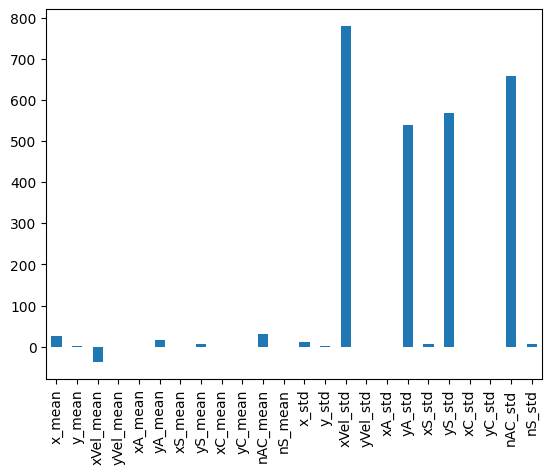

In [21]:
features[target.Swarm_Behaviour == 0].mean().plot.bar()

<Axes: >

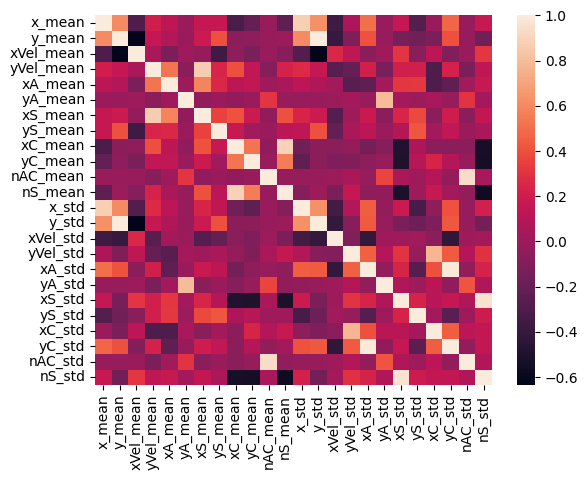

In [22]:
sns.heatmap(features.corr())

In [23]:
melted

,id,variable,value,time
0,0,x,562.05,1
1,1,x,175.66,1
2,2,x,200.16,1
3,3,x,316.99,1
4,4,x,1277.68,1
...,...,...,...,...
55941595,23304,nS,1.00,200
55941596,23305,nS,1.00,200
55941597,23306,nS,1.00,200
55941598,23307,nS,0.00,200


In [24]:
t_end = time.time()
t_total = round(t_end - t_start, 3)
mins = int(t_total//60)
seconds = int(t_total%60)

In [25]:
print(f"Time taken: {mins}m{seconds}s")

Time taken: 1m59s


In [26]:
df

,id,x_001,y_001,xVel_001,yVel_001,xA_001,yA_001,xS_001,yS_001,xC_001,...,xVel_200,yVel_200,xA_200,yA_200,xS_200,yS_200,xC_200,yC_200,nAC_200,nS_200
0,0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,...,-8.04,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0
1,1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,...,10.04,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0
2,2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,...,-8.02,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1
3,3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,...,-3.44,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0
4,4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,...,10.49,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,...,-9.72,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1
23305,23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,...,3.28,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1
23306,23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,...,-7.84,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1
23307,23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,...,-1.71,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0


In [1]:
# Testing
# For some reason it does not recognize these imports. I dont know what's wrong. Can someone help?

from functions.cross_validation import cross_validation_splits
from functions.test_validation_split import test_validation_split

# The 20 in this case is the percentage of test data (e.g. 80% of the data used in validation)
test_inputs, validation_inputs, test_targets, validation_targets = test_validation_split(features, target, 20)
folds = cross_validation_splits(validation_inputs, validation_targets, number_of_folds=5)

ModuleNotFoundError: No module named 'functions.cross_validation'